Animals project. Data exploratory analysis with original data

In [37]:
import os
print(os.getcwd())

/home/john/code/marcelafae/animals/Animal_Adoption/notebooks/models


In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
# Import dataframe from aac_intakes_outcomes.csv / Original data
csv_file_path = "/home/john/code/joagap/animals/raw_data/aac_intakes_outcomes.csv"
df = pd.read_csv(csv_file_path)
print(df.head())

  age_upon_outcome animal_id_outcome        date_of_birth outcome_subtype  \
0         10 years           A006100  2007-07-09 00:00:00             NaN   
1          7 years           A006100  2007-07-09 00:00:00             NaN   
2          6 years           A006100  2007-07-09 00:00:00             NaN   
3         10 years           A047759  2004-04-02 00:00:00         Partner   
4         16 years           A134067  1997-10-16 00:00:00             NaN   

      outcome_type sex_upon_outcome  age_upon_outcome_(days)  \
0  Return to Owner    Neutered Male                     3650   
1  Return to Owner    Neutered Male                     2555   
2  Return to Owner    Neutered Male                     2190   
3         Transfer    Neutered Male                     3650   
4  Return to Owner    Neutered Male                     5840   

   age_upon_outcome_(years) age_upon_outcome_age_group     outcome_datetime  \
0                      10.0                (7.5, 10.0]  2017-12-07 14:07:

In [4]:
# Check unique ids
unique_ids = df["animal_id_outcome"].nunique()

In [5]:
unique_ids

71961

In [6]:
duplicate_ids = df[df["animal_id_outcome"].duplicated()]["animal_id_outcome"].unique()
duplicate_ids

array(['A006100', 'A245945', 'A282897', ..., 'A768908', 'A768910',
       'A768917'], dtype=object)

In [9]:
len(duplicate_ids)

6071

In [10]:
len(duplicate_ids)/unique_ids * 100

8.436514222981893

In [11]:
# How to remove unique ids (df clean)
df.drop_duplicates(subset=["animal_id_outcome"], keep="first", inplace=True)

In [12]:
df[df["animal_id_outcome"].duplicated()]["animal_id_outcome"].unique()

array([], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71961 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            71961 non-null  object 
 1   animal_id_outcome           71961 non-null  object 
 2   date_of_birth               71961 non-null  object 
 3   outcome_subtype             35456 non-null  object 
 4   outcome_type                71955 non-null  object 
 5   sex_upon_outcome            71960 non-null  object 
 6   age_upon_outcome_(days)     71961 non-null  int64  
 7   age_upon_outcome_(years)    71961 non-null  float64
 8   age_upon_outcome_age_group  71961 non-null  object 
 9   outcome_datetime            71961 non-null  object 
 10  outcome_month               71961 non-null  int64  
 11  outcome_year                71961 non-null  int64  
 12  outcome_monthyear           71961 non-null  object 
 13  outcome_weekday             719

In [19]:
# Removing Bird and Other from the df
df = df[df['animal_type'].isin(['Dog', 'Cat'])]

# Columns to keep
cols_to_keep = ['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days']

# select only the desired columns
df = df[cols_to_keep]


/tmp/ipykernel_31711/3839334233.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


AttributeError: module 'seaborn' has no attribute 'colorbar'

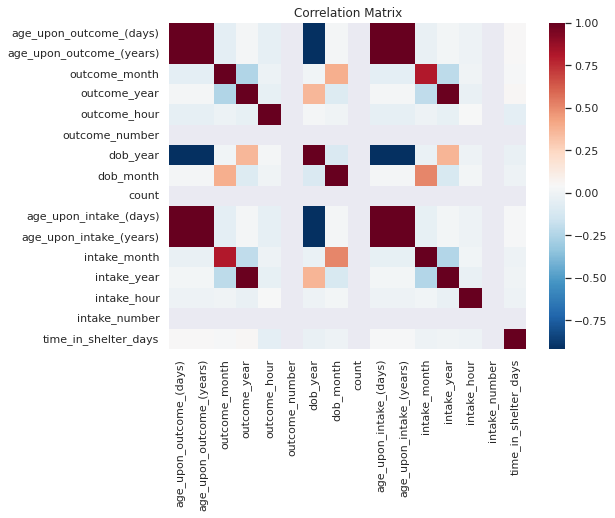

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming "df" is the name of your pandas dataframe
corr_matrix = df.corr()

# set the font size of the plot labels and tick marks
sns.set(font_scale=1.0)

# create a heatmap of the correlations
plt.figure(figsize=(8, 6)) # set figure size
ax = sns.heatmap(corr_matrix, cmap="RdBu_r")

# add a title to the plot
plt.title("Correlation Matrix")

# add a color bar to the plot
sns.colorbar()

# fix x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

# fix y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# save the plot as pdf file
plt.savefig("correlation_matrix.pdf", bbox_inches="tight")

# show the plot
plt.show()

/tmp/ipykernel_31711/1780163302.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


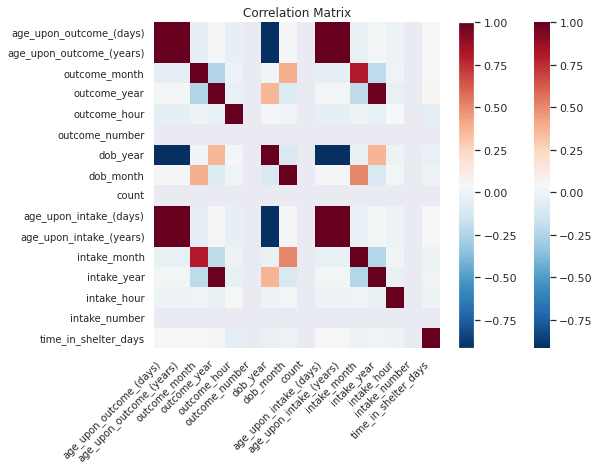

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming "df" is the name of your pandas dataframe
corr_matrix = df.corr()

# set the font size of the plot labels and tick marks
sns.set(font_scale=1.0)

# create a heatmap of the correlations
plt.figure(figsize=(8, 6)) # set figure size
ax = sns.heatmap(corr_matrix, cmap="RdBu_r")

# add a title to the plot
plt.title("Correlation Matrix")

# add a color bar to the plot
plt.colorbar(mappable=ax.collections[0])

# fix x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

# fix y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# save the plot as pdf file
plt.savefig("correlation_matrix.pdf", bbox_inches="tight")

# show the plot
plt.show()


/tmp/ipykernel_31711/2553737243.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


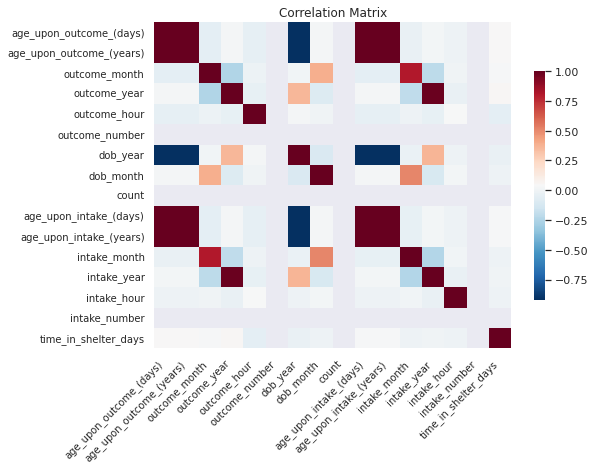

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming "df" is the name of your pandas dataframe
corr_matrix = df.corr()

# set the font size of the plot labels and tick marks
sns.set(font_scale=1.0)

# create a heatmap of the correlations
plt.figure(figsize=(8, 6)) # set figure size
ax = sns.heatmap(corr_matrix, cmap="RdBu_r", cbar_kws={"shrink": 0.7})

# add a title to the plot
plt.title("Correlation Matrix")

# fix x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

# fix y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# save the plot as pdf file
plt.savefig("correlation_matrix.pdf", bbox_inches="tight")

# show the plot
plt.show()


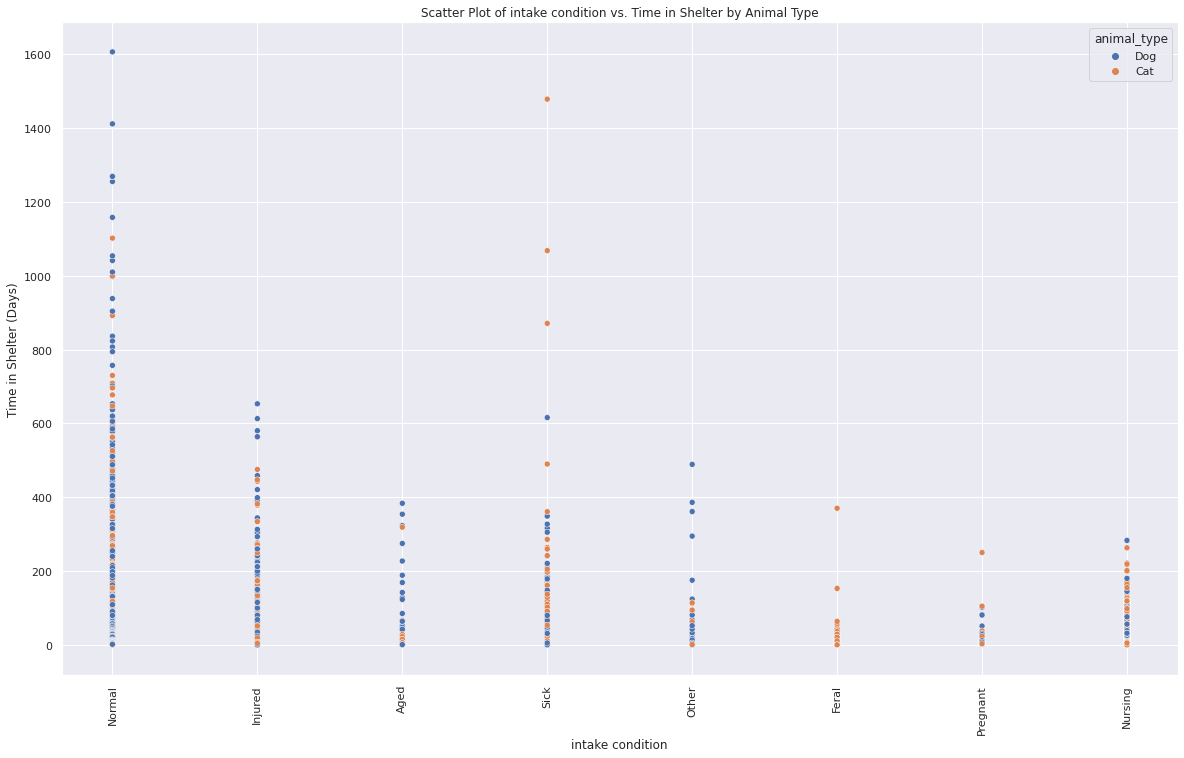

In [24]:
plt.figure(figsize=(20, 12))  # Adjust the figure size
sns.scatterplot(data=df, x="intake_condition", y="time_in_shelter_days", hue="animal_type")
plt.xlabel( "intake condition", fontsize=12)  # Adjust the font size of the x-axis label
plt.ylabel("Time in Shelter (Days)")
plt.title("Scatter Plot of intake condition vs. Time in Shelter by Animal Type")
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.show()

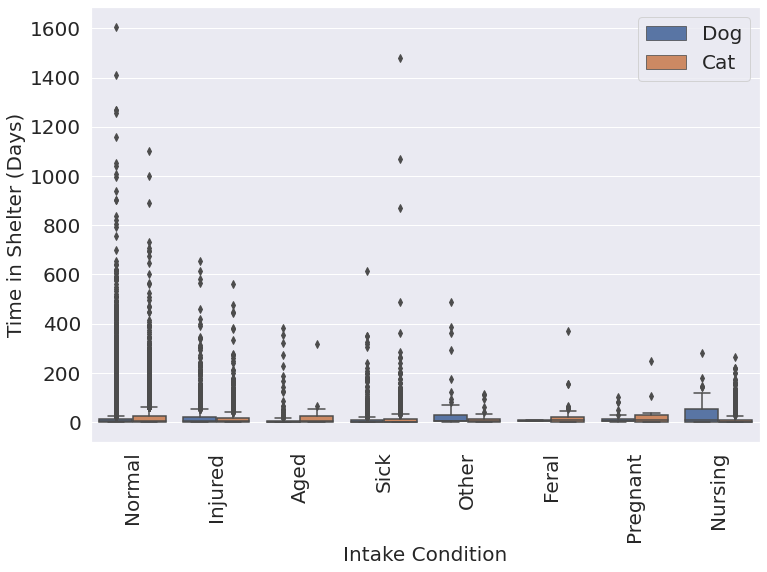

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.boxplot(data=df, x="intake_condition", y="time_in_shelter_days", hue="animal_type")
plt.xlabel("Intake Condition", fontsize=20)  # Adjust the font size of the x-axis label
plt.ylabel("Time in Shelter (Days)",fontsize=20)
#plt.title("Boxplot of Intake Condition vs. Time in Shelter by Animal Type")
plt.xticks(rotation=90,fontsize=20)  # Rotate the x-axis labels by 90 degrees
plt.yticks(fontsize=20)  # Rotate the x-axis labels by 90 degrees
plt.legend(loc='best', fontsize=20)
# save the plot as pdf file
plt.savefig("Boxplot.jpg", bbox_inches="tight")
plt.show()

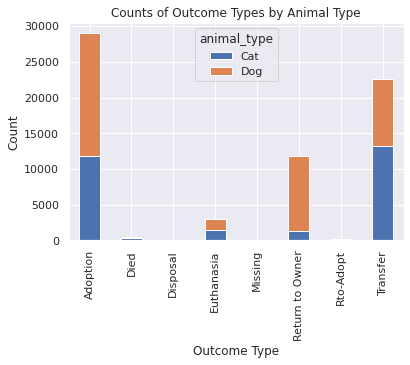

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Barplot with "outcome_type" and "animal_type"

outcome_counts = df.groupby(["outcome_type", "animal_type"]).size().unstack()
outcome_counts.plot(kind="bar", stacked=True)

plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.title("Counts of Outcome Types by Animal Type")
plt.savefig("Barplot.pdf", bbox_inches="tight")
plt.show()

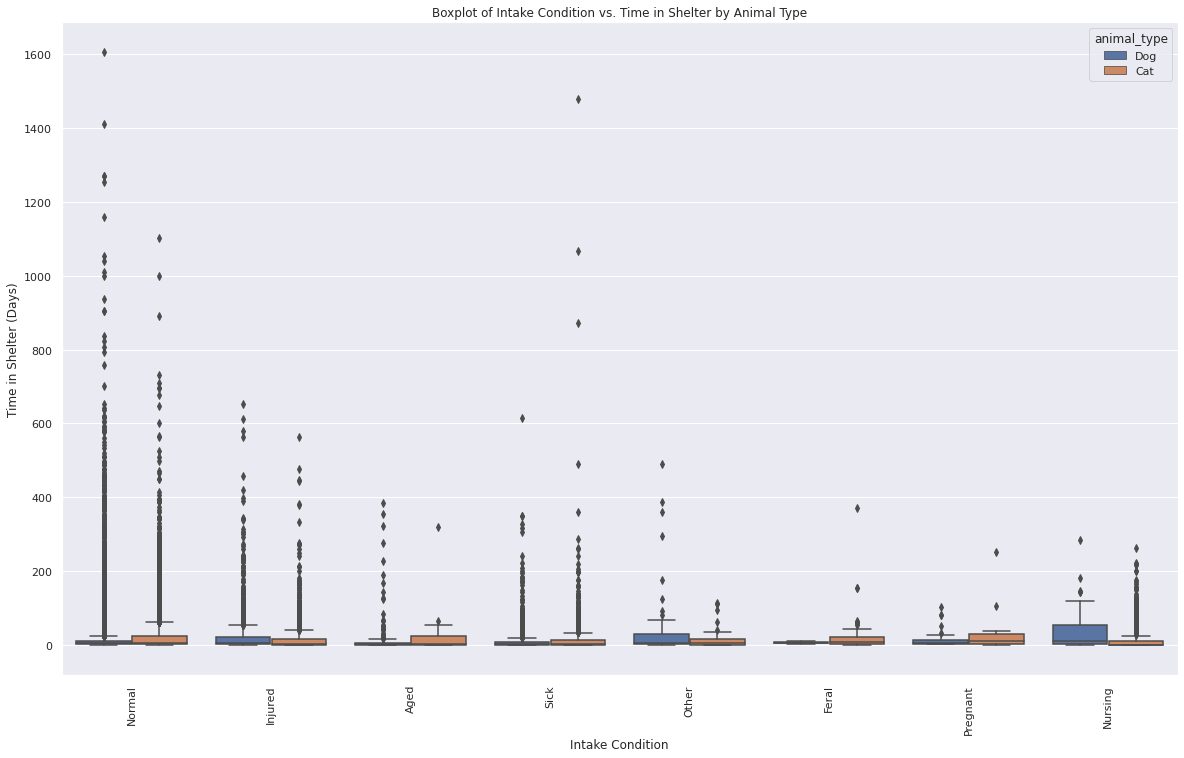

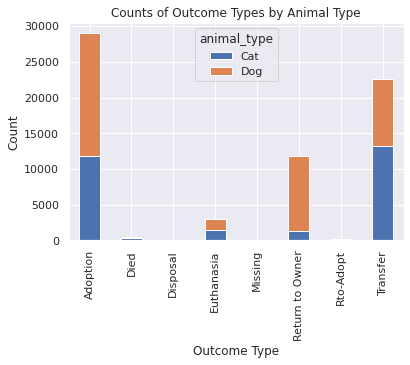

/tmp/ipykernel_31711/2459882509.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


AttributeError: module 'seaborn' has no attribute 'colorbar'

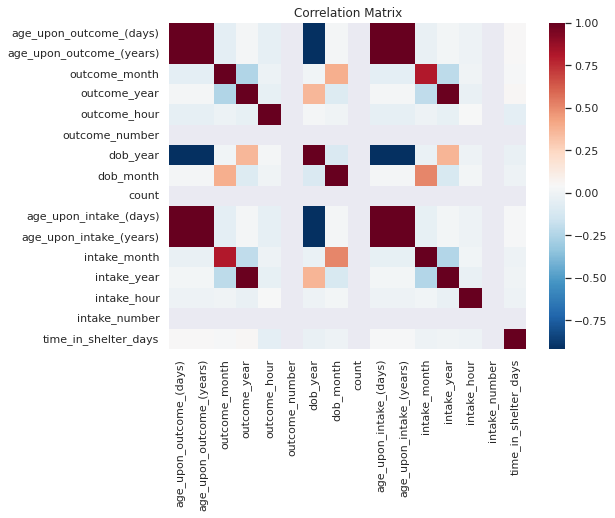

In [33]:
############
# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))  # Adjust the figure size
sns.boxplot(data=df, x="intake_condition", y="time_in_shelter_days", hue="animal_type")
plt.xlabel("Intake Condition", fontsize=12)  # Adjust the font size of the x-axis label
plt.ylabel("Time in Shelter (Days)")
plt.title("Boxplot of Intake Condition vs. Time in Shelter by Animal Type")
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.show()



#####
# Barplot
import pandas as pd
import matplotlib.pyplot as plt

# Barplot with "outcome_type" and "animal_type"

outcome_counts = df.groupby(["outcome_type", "animal_type"]).size().unstack()
outcome_counts.plot(kind="bar", stacked=True)

plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.title("Counts of Outcome Types by Animal Type")
plt.show()

##############
# Correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming "df" is the name of your pandas dataframe
corr_matrix = df.corr()

# set the font size of the plot labels and tick marks
sns.set(font_scale=1.0)

# create a heatmap of the correlations
plt.figure(figsize=(8, 6)) # set figure size
ax = sns.heatmap(corr_matrix, cmap="RdBu_r")

# add a title to the plot
plt.title("Correlation Matrix")

# add a color bar to the plot
sns.colorbar()

# fix x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

# fix y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# show the plot
plt.show()


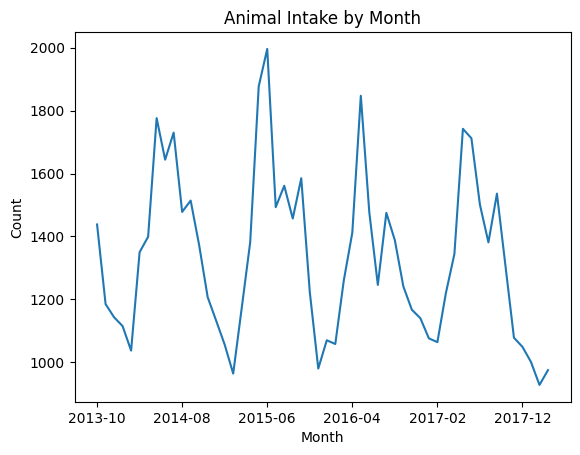

In [52]:
df['intake_monthyear'].value_counts().sort_index().plot()
plt.title('Animal Intake by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()